# Практическое задание к уроку 1

### Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно

## часть 1  перевод RGB в HSV 

In [267]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio
from skimage.color import rgb2hsv, hsv2rgb # for test

import warnings
warnings.filterwarnings("ignore")

In [116]:
img = imageio.imread('winter.jpg')
img.shape

(720, 960, 3)

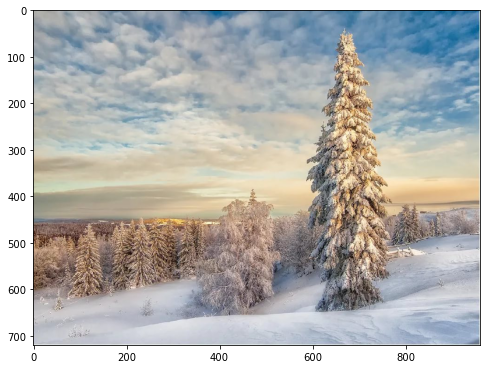

In [117]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

# RGB → HSV

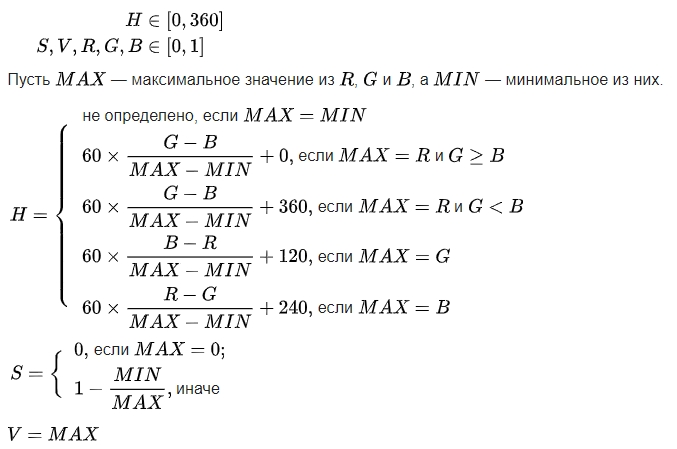

### slow_metod

In [118]:
def H(RGB):

    MAX=np.max(RGB)
    MIN=np.min(RGB)
    R=RGB[0]; G=RGB[1]; B=RGB[2]
    s=0.
    h=0.
    if MIN!=MAX:
        if (MAX==R) & (G>=B):
            h=60*(G-B)/(MAX-MIN)
        elif (MAX==R) & (G<B):
            h=360+(60*(G-B)/(MAX-MIN))
        elif (MAX==G):
            h=120+(60*(B-R)/(MAX-MIN))
        elif (MAX==B):
            h=240+(60*(R-G)/(MAX-MIN))
        #else:
         #
    
    if MAX!=0:
        s=1-(MIN/MAX)
      
    v=MAX
    return [h,s,v]

In [123]:
%%time
k_norm=[360,1,255] # нормирование
image_to_hsv=np.apply_along_axis(H, -1,img.astype('float32'))/k_norm


Wall time: 51.5 s


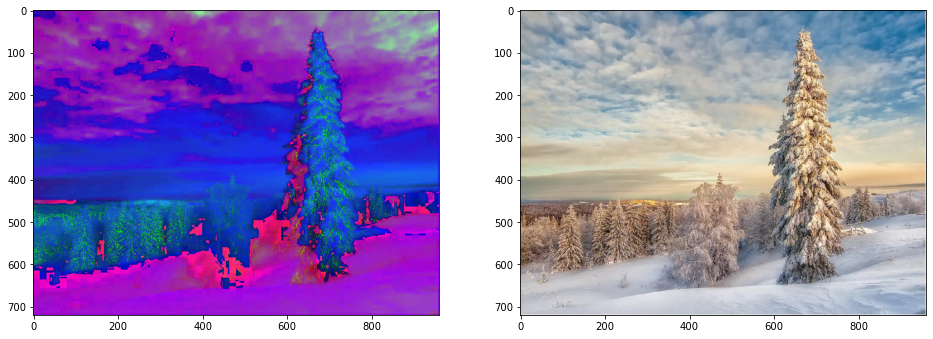

In [166]:
fig=plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image_to_hsv)
ax2.imshow(hsv2rgb(image_to_hsv)) ## обратное проверочное пробразование skimage.color (rgb2hsv)
plt.show()

### fast_metod 

In [152]:
def rgb_hsv(img_rgb):
    img_rgb = img_rgb.astype('float32')
    MAX = np.amax(img_rgb, axis=2)
    MIN = np.amin(img_rgb, axis=2)
    MAX_pos = np.argmax(img_rgb, axis=2)
    MIN_pos = np.argmin(img_rgb, axis=2)
    k_norm=[360,1,255] # нормирование

    img_hsv = np.zeros(img_rgb.shape, dtype='float32')
    img_hsv[maxc == minc, 0] = np.zeros(hsv[maxc == minc, 0].shape)
    ### Hue 
    # np.spacing(1) for MAX - MIN <>0
    img_hsv[MAX_pos == 0, 0] = (((img_rgb[..., 1] - img_rgb[..., 2]) * 60.0 / (MAX - MIN + np.spacing(1))) % 360.0)[MAX_pos == 0]
    img_hsv[MAX_pos == 1, 0] = (((img_rgb[..., 2] - img_rgb[..., 0]) * 60.0 / (MAX - MIN + np.spacing(1))) + 120.0)[MAX_pos == 1]
    img_hsv[MAX_pos == 2, 0] = (((img_rgb[..., 0] - img_rgb[..., 1]) * 60.0 / (MAX - MIN + np.spacing(1))) + 240.0)[MAX_pos == 2]
    ### Saturation
    img_hsv[MAX == 0, 1] = np.zeros(img_hsv[MAX == 0, 1].shape)
    img_hsv[MAX != 0, 1] = (1 - MIN / (MAX + np.spacing(1)))[MAX != 0]
    ### Value
    img_hsv[..., 2] = MAX
    return img_hsv/k_norm

In [163]:
%%time
rgb_to_hsv=rgb_hsv(img)

Wall time: 228 ms


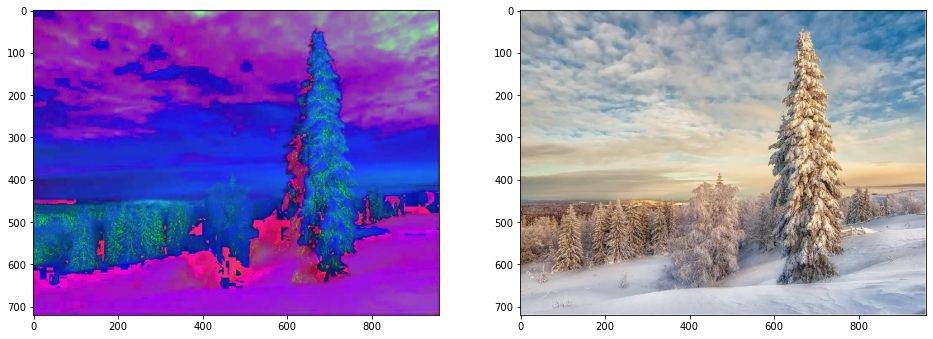

In [165]:
fig=plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(rgb_to_hsv)
ax2.imshow(hsv2rgb(rgb_to_hsv)) ## обратное проверочное пробразование skimage.color (rgb2hsv)
plt.show()

## часть 2  фильтрация
#### Детектирование границ

In [175]:
img = imageio.imread('winter.jpg')
img = img.astype(np.float32) / 255.

In [262]:
win_size = (3, 3)
w_h=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
w_v=np.array([[-1,-1,-1],[0,0,0],[1,1,1]])


In [263]:
out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1,
     3), 
     dtype=np.float32)

In [269]:
%%time
for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img[i:i+w.shape[0], j:j+w.shape[1]]
        for c in range(0, 3):
            result=np.abs(np.sum(w_h * x[:,:,c]+ w_v * x[:,:,c]))
            if result>1:
                result=1
            out_img[i,j,c] =result 
      

Wall time: 2min 52s


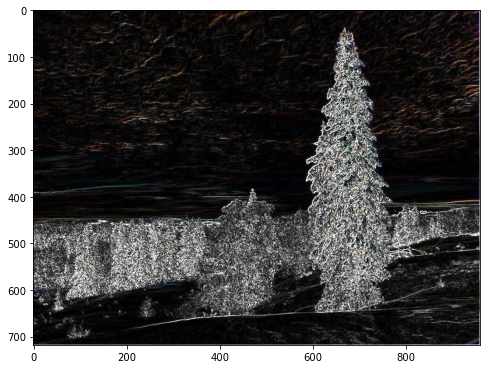

In [270]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img)